In [1]:
# install CitiPy
!pip install citipy
# wanted to use this to get an ETA on the data collecting for loop because it takes a while
!pip install progressbar2

In [2]:
# dependencies
from citipy import citipy
import matplotlib.pyplot as plt
import requests as req
import numpy as np
import time
import progressbar

In [3]:
cities = []
# loop until there are over 500 unique cities
while (len(cities) < 500):
    # get list of random lat and lng
    lats = np.random.randint(low=-90, high=90, size=1000)
    lons = np.random.randint(low=-180, high=180, size=1000)

    # convert to list
    lats = lats.tolist()
    lons = lons.tolist()

    # get list of cities
    for i in range(len(lats)):
        city = citipy.nearest_city(lats[i], lons[i])
        cities.append(city.city_name)

    # remove duplicates
    print('Before: ' + str(len(cities)))
    before = len(cities)
    cities = list(set(cities))
    print('After: ' + str(len(cities)))
    after = len(cities)
    print('Removed ' + str(before - after) + ' duplicates')
    
print(str(len(cities)) + ' unique cities found!')

Before: 1000
After: 433
Removed 567 duplicates
Before: 1433
After: 710
Removed 723 duplicates
710 unique cities found!


In [4]:
# set key
open_weather_key = '25bc90a1196e6f153eece0bc0b0fc9eb'

# initalize lists
temps = []
humidity = []
clouds = []
wind = []
city_lat = []
city_lng = []

# initalize progress bar
bar = progressbar.ProgressBar()



while(len(temps) < 500 or len(humidity) < 500 or len(clouds) < 500 or len(wind) < 500 or len(city_lat) < 500):
    # set error count
    count = 0
    
    # get city weather data
    for j in bar(range(len(cities))):
        time.sleep(0.02)
        city = cities[j]
        url = "http://api.openweathermap.org/data/2.5/weather?"

        try:
            # Build query URL
            query_url = url + "appid=" + open_weather_key + "&q=" + city + '&units=imperial'

            test = req.get(query_url).json()

            temps.append(test['main']['temp'])
            humidity.append(test['main']['humidity'])
            clouds.append(test['clouds']['all'])
            wind.append(test['wind']['speed'])
            city_lat.append(test['coord']['lat'])
        except:
            count += 1

    print('No data found for ' + str(count) + ' cities')

    if(len(temps) < 500 or len(humidity) < 500 or len(clouds) < 500 or len(wind) < 500 or len(city_lat) < 500):
        print('Not enough data. Running script again.')

100% (710 of 710) |#######################| Elapsed Time: 0:05:02 Time: 0:05:02


No data found for 73 cities


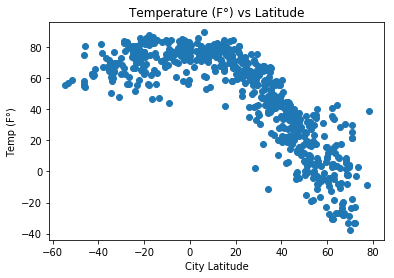

In [5]:
plt.scatter(city_lat, temps)
plt.title('Temperature (F°) vs Latitude')
plt.ylabel('Temp (F°)')
plt.xlabel('City Latitude')
plt.show()

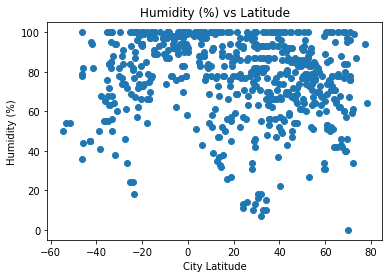

In [6]:
plt.scatter(city_lat, humidity)
plt.title('Humidity (%) vs Latitude')
plt.ylabel('Humidity (%)')
plt.xlabel('City Latitude')
plt.show()

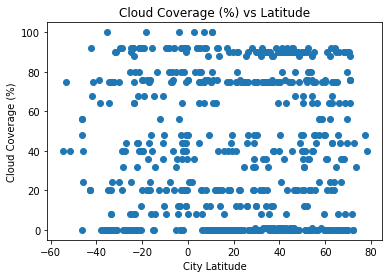

In [7]:
plt.scatter(city_lat, clouds)
plt.title('Cloud Coverage (%) vs Latitude')
plt.ylabel('Cloud Coverage (%)')
plt.xlabel('City Latitude')
plt.show()

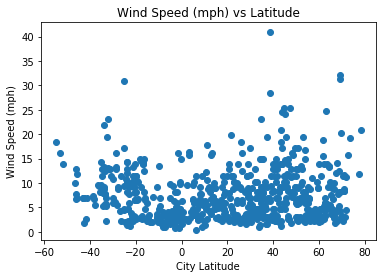

In [8]:
plt.scatter(city_lat, wind)
plt.title('Wind Speed (mph) vs Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('City Latitude')
plt.show()